In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [64]:
a = 0
b = 10
c = 4
h = 1.0
ua = 0
ub = 10
k1 = 10
k2 = 1

def g(x):
    M = (ub - ua)/((c-a)/k1 + (b-c)/k2)
    if x < c:
        return ua + M/k1*(x - a)
    else:
        return ua + M/k1*(c - a) + M/k2*(x - c)

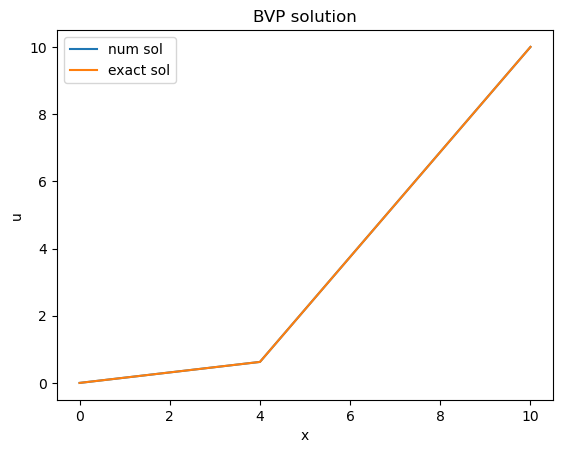

In [68]:
# define block structure of A
d = [-2*k1, -2*k1, -2*k1, -k1-k2, -2*k2, -2*k2, -2*k2, -2*k2, -2*k2]
dsub = [k1, k1, k1, k2, k2, k2, k2, k2, k2]
dsuper = [k1, k1, k1, k1, k2, k2, k2, k2, k2]
A = spdiags([dsub, d, dsuper], [-1, 0, 1]).toarray()

# define f
f = np.zeros(9)
f[0] = -k1*ua
f[-1] = -k2*ub

# solve Au=f for u, convert u to 2d array, fill in BCs
u = np.linalg.solve(A, f)
u = np.pad(u, (1, 1))
u[0] = ua
u[-1] = ub

# plot u
plt.title('BVP solution')
plt.xlabel('x')
plt.ylabel('u')
x_list = np.arange(a, b+h, h)
plt.plot(x_list, u, label = "num sol")
u_exact = [g(x) for x in x_list]
plt.plot(x_list, u_exact, label = "exact sol")
plt.legend()
plt.savefig('hw7 q1 plot.png')
plt.show()